<a href="https://colab.research.google.com/github/enznoor/AnomalyDetection/blob/main/FIP_Libra_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score , roc_curve, roc_auc_score, auc
from sklearn import svm

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler ,TensorDataset

In [ ]:
# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU.")

GPU is available. Using GPU.


In [ ]:
#Load Data to memory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='drive/MyDrive/Term_05/FinalProposal/Data/'
train_edge_index=np.load(path+'train_edge_index.npy')
train_edgelist=np.load(path+'train_edgelist.npy')
train_edge_weight=np.load(path+'train_edge_weight.npy')
train_x=np.load(path+'train_x.npy')
train_y=np.load(path+'train_y.npy')

In [ ]:
test_edge_index=np.load(path+'test_edge_index.npy')
test_edgelist=np.load(path+'test_edgelist.npy')
test_edge_weight=np.load(path+'test_edge_weight.npy')
test_x=np.load(path+'test_x.npy')
test_y=np.load(path+'test_y.npy')

# With pytorch

In [ ]:
# Convert data to PyTorch tensors

X_train_tensor = torch.tensor(train_x)
y_train_tensor = torch.tensor(train_y)
X_test_tensor = torch.tensor(test_x)
y_test_tensor = torch.tensor(test_y)

In [ ]:
#for i in range(len(y_train_tensor)):
#    if y_train_tensor[i] == 0: y_train_tensor[i] = 1
#    else: y_train_tensor[i] = -1

In [ ]:
svm_model=svm.OneClassSVM(nu=0.5,kernel='sigmoid', gamma=0.1)

In [ ]:
svm_model.fit(X_train_tensor, y_train_tensor)

OneClassSVM(gamma=0.1, kernel='sigmoid')

In [ ]:
#Initialize and train the SVM model
#svm_model = SVC(kernel='poly', C=1.0 )
#svm_model.fit(X_train_tensor, y_train_tensor)

In [ ]:
y_pred_test = svm_model.predict(X_test_tensor)

In [ ]:
predicted_labels = (y_pred_test >= 0.5)
predicted_labels=np.squeeze(predicted_labels)


In [ ]:
predicted_labelsList=[]
for i in predicted_labels:
    if i==True:
        predicted_labelsList.append(1)
    else:
        predicted_labelsList.append(0)

In [ ]:
predicted=torch.Tensor(predicted_labelsList)

In [ ]:
accuracy = torch.sum(predicted == y_test_tensor).item() / y_test_tensor.size(0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9059


In [ ]:
print(classification_report(y_test_tensor, predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     40386
         1.0       0.02      0.63      0.03       100

    accuracy                           0.91     40486
   macro avg       0.51      0.77      0.49     40486
weighted avg       1.00      0.91      0.95     40486



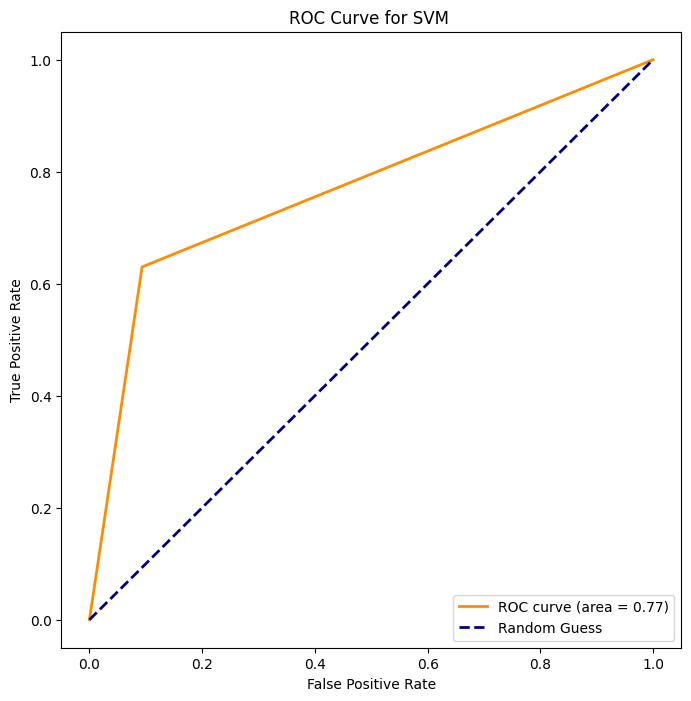

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_tensor, predicted)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM ')
plt.legend(loc='lower right')
plt.show()

In [ ]:
n_error_test = y_pred_test[y_pred_test == 1].size /len(X_test_tensor)

In [ ]:
n_error_test

0.500345798547646

In [ ]:
# Calculate AUC score
auc_score = roc_auc_score(y_test_tensor, predicted)
print('AUC score:', auc_score)

AUC score: 0.7504456990046056


In [ ]:
print('tp:',tp)
print('fp:',fp)
print('fn:',fn)
# Calculate Precision For Class: Anomal
precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0.0
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'False Negative: {fn}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

tp: 9
fp: 4
fn: 91
True Positives: 9
False Positives: 4
False Negative: 91
Precision: 0.6923
Recall: 0.0900


In [ ]:
tp = torch.sum((y_test_tensor ==0) & (predicted== 0)).item()
fp = torch.sum((y_test_tensor == 1) & (predicted == 0)).item()
fn = torch.sum((y_test_tensor == 0) & (predicted == 1)).item()

In [ ]:
print('tp:',tp)
print('fp:',fp)
print('fn:',fn)
# Calculate Precision For Class: normal
precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0.0
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

tp: 40382
fp: 91
fn: 4
True Positives: 40382
False Positives: 91
Precision: 0.9978
Recall: 0.9999
